In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [947]:
train_df=pd.read_csv("/content/loan_prediction_train.csv")
test_df=pd.read_csv("/content/loan_prediction_test.csv")

## Training Data

In [948]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [949]:
train_df.shape

(614, 13)

In [950]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [951]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [952]:
train_df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [953]:
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [954]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    if train_df[col].dtype == 'object':
        mode_value = train_df[col].mode()[0]
        train_df[col].fillna(mode_value, inplace=True)
    else:
        mean_value = train_df[col].mean()
        train_df[col].fillna(mean_value, inplace=True)

In [955]:
train_df.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [956]:
train_df.duplicated().sum()

0

<Axes: xlabel='Loan_Status', ylabel='count'>

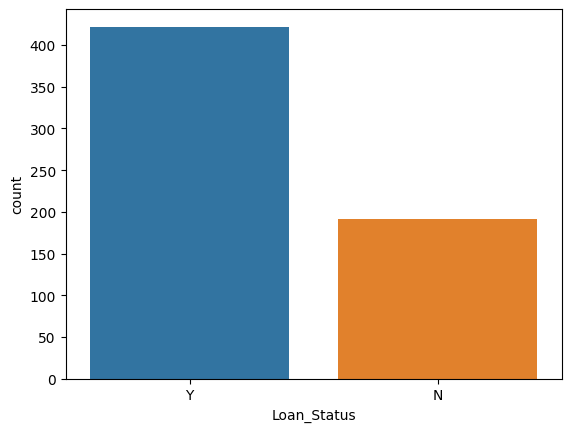

In [957]:
sns.countplot(x='Loan_Status',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

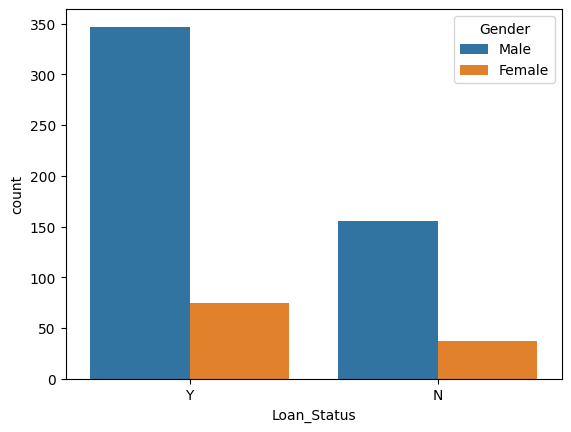

In [958]:
sns.countplot(x='Loan_Status',hue='Gender',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

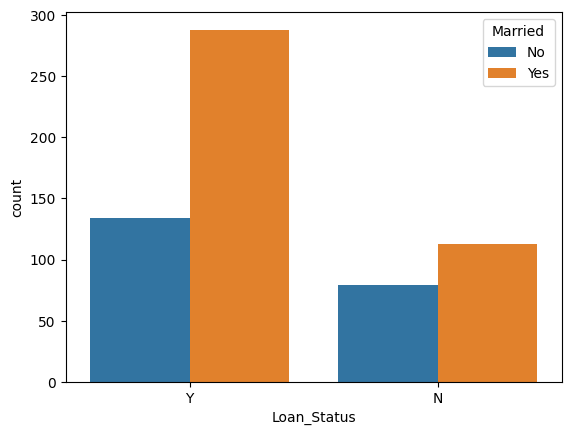

In [959]:
sns.countplot(x='Loan_Status',hue='Married',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

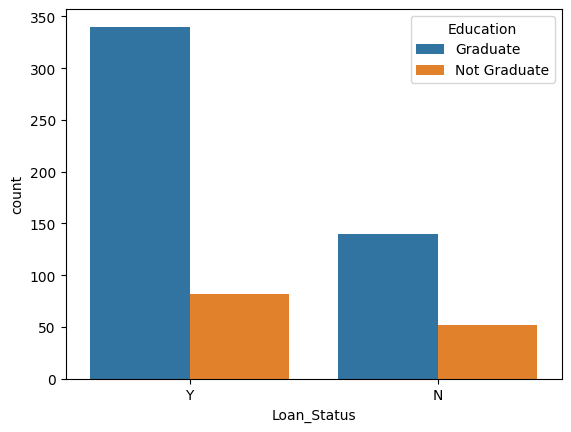

In [960]:
sns.countplot(x='Loan_Status',hue='Education',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

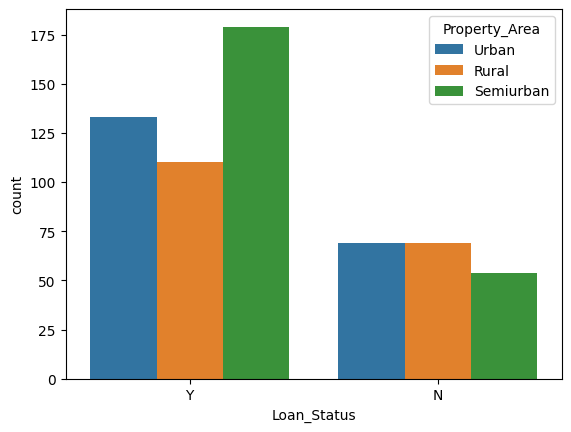

In [961]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

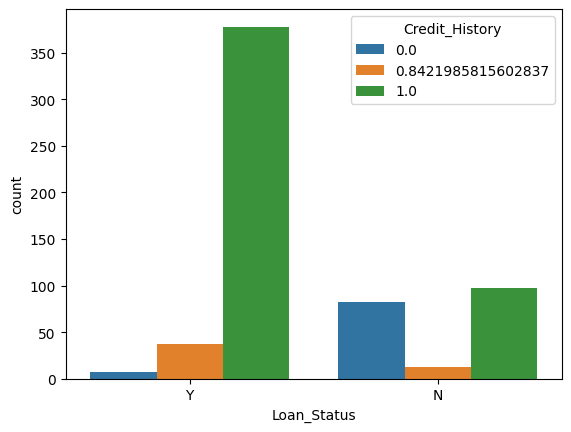

In [962]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=train_df)

<Axes: xlabel='Loan_Status', ylabel='count'>

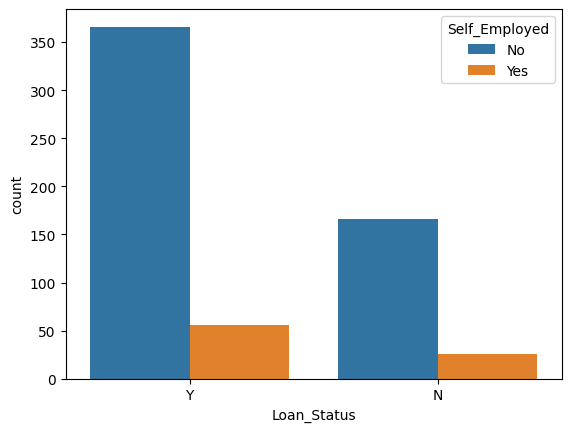

In [963]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=train_df)

<ipython-input-964-847447081300>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True)


<Axes: >

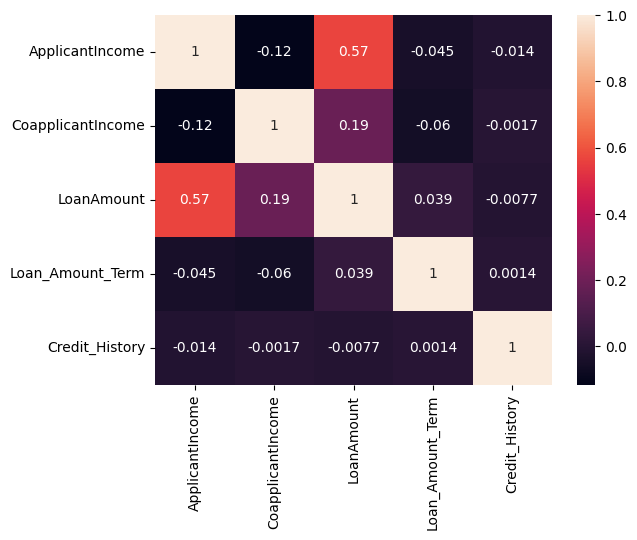

In [964]:
sns.heatmap(train_df.corr(),annot=True)

## Test Data

In [965]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [966]:
test_df.shape

(367, 12)

In [967]:
test_df.isna().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [968]:
null_cols = ['Credit_History', 'Self_Employed', 'Gender', 'Dependents', 'Loan_Amount_Term', 'LoanAmount']

for col in null_cols:
    if test_df[col].dtype == 'object':
        mode_value = test_df[col].mode()[0]
        test_df[col].fillna(mode_value, inplace=True)
    else:
        mean_value = test_df[col].mean()
        test_df[col].fillna(mean_value, inplace=True)

In [969]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [970]:
test_df.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [971]:
test_df.duplicated().sum()

0

## Preprocessing

In [972]:
train_df.drop(['Loan_ID'],axis=1,inplace=True)

In [973]:
test_df.drop(['Loan_ID'],axis=1,inplace=True)

In [974]:
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['Married'] = train_df['Married'].map({'Yes': 1, 'No': 0})
train_df['Dependents'] = train_df['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
train_df['Education'] = train_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes': 1, 'No': 0})
train_df['Property_Area'] = train_df['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [975]:
test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['Married'] = test_df['Married'].map({'Yes': 1, 'No': 0})
test_df['Dependents'] = test_df['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
test_df['Education'] = test_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes': 1, 'No': 0})
test_df['Property_Area'] = test_df['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})

In [976]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [977]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [978]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.000000,0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.000000,0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.000000,0
3,1,1,2,1,0,2340,2546,100.0,360.0,0.825444,0
4,1,0,0,0,0,3276,0,78.0,360.0,1.000000,0


## Model Building

In [979]:
x=train_df.drop(['Loan_Status'],axis=1)
y=train_df['Loan_Status']

In [980]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0


In [981]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [982]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [983]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=40)

In [984]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

log_reg=LogisticRegression(max_iter=100, random_state=42)

log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)

log_acc = accuracy_score(y_test, log_pred)
conf_matrix_log = confusion_matrix(y_test, log_pred)
classification_rep_log = classification_report(y_test, log_pred)

print(f"\nAccuracy: {log_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_log)
print("\nClassification Report:")
print(classification_rep_log)


Accuracy: 0.8373983739837398

Confusion Matrix:
[[12 19]
 [ 1 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



In [985]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='gini')

dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

dt_acc = accuracy_score(y_test, dt_pred)
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
classification_rep_dt = classification_report(y_test, dt_pred)

print(f"\nAccuracy: {dt_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(classification_rep_dt)


Accuracy: 0.7967479674796748

Confusion Matrix:
[[12 19]
 [ 6 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        31
           1       0.82      0.93      0.87        92

    accuracy                           0.80       123
   macro avg       0.74      0.66      0.68       123
weighted avg       0.78      0.80      0.78       123



In [986]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=3)

rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_acc = accuracy_score(y_test, rf_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
classification_rep_rf = classification_report(y_test, rf_pred)

print(f"\nAccuracy: {rf_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)


Accuracy: 0.8373983739837398

Confusion Matrix:
[[12 19]
 [ 1 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



In [987]:
import xgboost as xgb
xgb=xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
conf_matrix_xgb = confusion_matrix(y_test, xgb_pred)
classification_rep_xgb = classification_report(y_test, xgb_pred)

print(f"\nAccuracy: {xgb_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(classification_rep_xgb)


Accuracy: 0.8048780487804879

Confusion Matrix:
[[12 19]
 [ 5 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.82      0.95      0.88        92

    accuracy                           0.80       123
   macro avg       0.76      0.67      0.69       123
weighted avg       0.79      0.80      0.78       123



In [988]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',)

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

knn_acc = accuracy_score(y_test, knn_pred)
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
classification_rep_knn = classification_report(y_test, knn_pred)

print(f"\nAccuracy: {knn_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)


Accuracy: 0.8048780487804879

Confusion Matrix:
[[12 19]
 [ 5 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.82      0.95      0.88        92

    accuracy                           0.80       123
   macro avg       0.76      0.67      0.69       123
weighted avg       0.79      0.80      0.78       123



In [989]:
from sklearn import svm

svm=svm.SVC(kernel='sigmoid', random_state=42, gamma='auto')

svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
classification_rep_svm = classification_report(y_test, svm_pred)

print(f"\nAccuracy: {svm_acc}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(classification_rep_svm)


Accuracy: 0.8048780487804879

Confusion Matrix:
[[12 19]
 [ 5 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.82      0.95      0.88        92

    accuracy                           0.80       123
   macro avg       0.76      0.67      0.69       123
weighted avg       0.79      0.80      0.78       123



In [990]:
compare= {'Model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','SVM'],
          'Accuracy':[log_acc, dt_acc, rf_acc, xgb_acc, knn_acc, svm_acc]}
compare_df=pd.DataFrame(compare)
compare_df

,Model,Accuracy
0,LogisticRegression,0.837398
1,DecisionTreeClassifier,0.796748
2,RandomForestClassifier,0.837398
3,XGBClassifier,0.804878
4,KNeighborsClassifier,0.804878
5,SVM,0.804878


In [991]:
test_df['Loan_Status']=rf.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [992]:
test_df['Loan_Status'].unique()

array([1, 0])

In [993]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.000000,0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.000000,0,0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.000000,0,0
3,1,1,2,1,0,2340,2546,100.0,360.0,0.825444,0,0
4,1,0,0,0,0,3276,0,78.0,360.0,1.000000,0,1
